In [79]:
import os
import pandas as pd
import numpy as np
from matplotlib.lines import Line2D
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

sns.set_theme(style="whitegrid", palette="Set2")
sns.set_context("paper")
plt.rcParams['savefig.dpi'] = 300

CSV_0_PATH = Path("data", "wandb_export_classification_report_aa0awl7a_o_token_conll.csv")
CSV_1_PATH = Path("data", "wandb_export_classification_report_z1p1qc0v_o_token_conll_2.csv")
EXTRA_ROW_INDEX = 186

relevant_columns = ["micro avg", "run_name", "neg_o_prob"]

In [80]:
df_0 = pd.read_csv(CSV_0_PATH)
df_1 = pd.read_csv(CSV_1_PATH)

In [81]:
df_0 = df_0.loc[(df_0["metric"] == "f1-score")]

In [82]:
extra_row = df_1.loc[186].to_frame().T

In [87]:
df = pd.concat([df_0, extra_row])
df_per_label = df.copy()
df = df[relevant_columns]

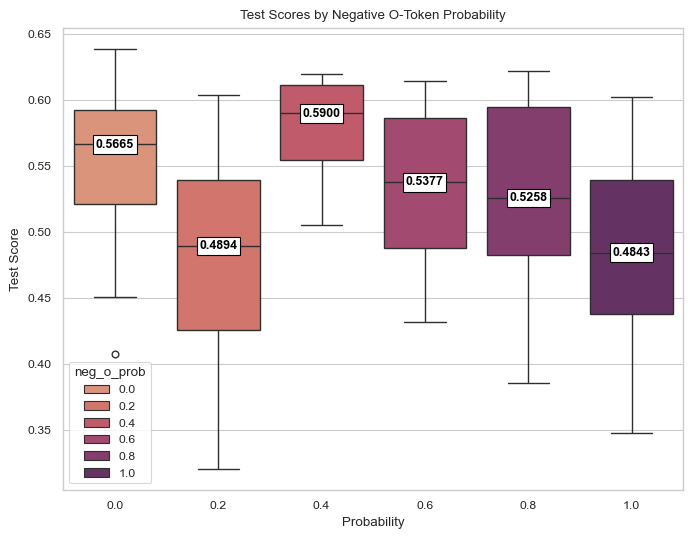

In [84]:
X_SIZE = 8
Y_SIZE = 6
plt.figure(figsize=(X_SIZE, Y_SIZE))

box_plot = sns.boxplot(
    data=df,
    x='neg_o_prob', 
    y='micro avg', 
    hue='neg_o_prob', 
    palette=sns.color_palette("flare")
)

plt.title('Test Scores by Negative O-Token Probability')
plt.xlabel('Probability')
plt.ylabel('Test Score')

medians = df.groupby(['neg_o_prob'])['micro avg'].median()

# Get the current axis
ax = plt.gca()

# Calculate the vertical offset based on the plot size
y_range = ax.get_ylim()[1] - ax.get_ylim()[0]
vertical_offset = y_range * 0.01  # 2% of the y-axis range

x_margin = X_SIZE = 0.025
y_margin = Y_SIZE = 0.0025

for xtick in box_plot.get_xticks():
    median = medians.iloc[xtick]
    text = ax.text(
        xtick, 
        median,
        f'{median:.4f}', 
        horizontalalignment='center',
        verticalalignment='center',
        size=9,
        color='black',
        weight='semibold'
    )
    
    # Get the bounding box of the text
    bbox = text.get_window_extent(renderer=plt.gcf().canvas.get_renderer())
    
    # Convert bbox to data coordinates
    bbox_data = bbox.transformed(ax.transData.inverted())
    
    rect = plt.Rectangle((bbox_data.x0 - x_margin, bbox_data.y0 - y_margin), 
                         bbox_data.width + 2*x_margin, 
                         bbox_data.height + 2*y_margin, 
                         facecolor='white', 
                         edgecolor='black', 
                         # alpha=0.7, 
                         zorder=3)
    
    ax.add_patch(rect)
    
    # Bring the text to the front
    text.set_zorder(4)

save_path = Path(os.getcwd(), "output_figs", "neg_o_token_fig.png")
plt.savefig(save_path, bbox_inches='tight')
plt.show()

In [85]:
stats = df.groupby('neg_o_prob')['micro avg'].agg(['max', 'min', 'median', 'mean', 'std'])
stats.columns = ['Highest', "Lowest", 'Median', 'Mean', 'Standard Deviation']
stats = stats.round(4)
stats

,Highest,Lowest,Median,Mean,Standard Deviation
neg_o_prob,,,,,
0.0,0.639159,0.407244,0.566514,0.54746,0.0717
0.2,0.604273,0.320635,0.489429,0.480913,0.0844
0.4,0.620169,0.505315,0.590006,0.578639,0.0401
0.6,0.614445,0.432081,0.53772,0.531639,0.0645
0.8,0.621793,0.385816,0.525839,0.521341,0.0830
1.0,0.602109,0.347673,0.484339,0.484769,0.0824


In [86]:
def highlight_max(s, props=''):
    return np.where(s == np.nanmax(s.values), props, '')

def highlight_second_max(s, props=''):
    return np.where(s == np.sort(s.values)[-2], props, '')

styled_stats = stats.style.format(precision=4)
styled_stats = styled_stats.apply(highlight_max, props="textbf:--rwrap;", subset=stats.columns[0:-1], axis=0)
styled_stats = styled_stats.apply(highlight_second_max, props="ul:--rwrap;", subset=stats.columns[0:-1], axis=0)
print(styled_stats.to_latex())

\begin{tabular}{lllllr}
 & Highest & Lowest & Median & Mean & Standard Deviation \\
neg_o_prob &  &  &  &  &  \\
0.000000 & \textbf{0.6392} & 0.4072 & \ul{0.5665} & \ul{0.5475} & 0.0717 \\
0.200000 & 0.6043 & 0.3206 & 0.4894 & 0.4809 & 0.0844 \\
0.400000 & 0.6202 & \textbf{0.5053} & \textbf{0.5900} & \textbf{0.5786} & 0.0401 \\
0.600000 & 0.6144 & \ul{0.4321} & 0.5377 & 0.5316 & 0.0645 \\
0.800000 & \ul{0.6218} & 0.3858 & 0.5258 & 0.5213 & 0.0830 \\
1.000000 & 0.6021 & 0.3477 & 0.4843 & 0.4848 & 0.0824 \\
\end{tabular}



In [88]:
df_per_label

,Unnamed: 0,metric,PER,LOC,ORG,MISC,micro avg,macro avg,weighted avg,run_name,run_corpus,run_type,k_shot_num,loss_function,neg_o_prob
2,2,f1-score,0.39084,0.628226,0.400475,0.359712,0.452998,0.444813,0.459911,magic-sweep-60,CONLL03,contrastive,8,tml,1.0
6,2,f1-score,0.867234,0.67573,0.407026,0.439834,0.602504,0.597456,0.622215,dainty-sweep-59,CONLL03,contrastive,8,tml,0.8
10,2,f1-score,0.442835,0.681755,0.426778,0.34052,0.49119,0.472972,0.495955,colorful-sweep-58,CONLL03,contrastive,8,tml,0.6
14,2,f1-score,0.450154,0.690011,0.378092,0.507704,0.505315,0.50649,0.506951,eager-sweep-57,CONLL03,contrastive,8,tml,0.4
18,2,f1-score,0.43281,0.634406,0.397528,0.475368,0.491228,0.485028,0.48726,logical-sweep-56,CONLL03,contrastive,8,tml,0.2
22,2,f1-score,0.818237,0.586619,0.406653,0.450206,0.578413,0.565429,0.58305,solar-sweep-55,CONLL03,contrastive,8,tml,0.0
26,2,f1-score,0.797414,0.568745,0.35596,0.389024,0.55165,0.527786,0.549297,restful-sweep-54,CONLL03,contrastive,8,tml,1.0
30,2,f1-score,0.38004,0.715148,0.382353,0.423871,0.479158,0.475353,0.485134,lilac-sweep-53,CONLL03,contrastive,8,tml,0.8
34,2,f1-score,0.688808,0.606854,0.534043,0.442586,0.587009,0.568073,0.588487,devoted-sweep-52,CONLL03,contrastive,8,tml,0.6
38,2,f1-score,0.800608,0.67639,0.446215,0.40549,0.607092,0.582176,0.610591,tough-sweep-51,CONLL03,contrastive,8,tml,0.4


In [105]:
df_means_conll = df_per_label.loc[(df_per_label['neg_o_prob'] == 0.0) | (df_per_label['neg_o_prob'] == 0.4), ["PER", "LOC", "ORG", "MISC", "micro avg", "macro avg", "neg_o_prob"]]
df_means_conll = df_means_conll.groupby(["neg_o_prob"]).mean()
# df_means_conll.columns = ["NE", "F1"]
# df_means_conll = df_means_conll.sort_values(by="F1", ascending=False).reset_index(drop=True)
df_means_conll

,PER,LOC,ORG,MISC,micro avg,macro avg
neg_o_prob,,,,,,
0.0,0.6328,0.64524,0.408406,0.435457,0.54746,0.530476
0.4,0.76578,0.637169,0.404943,0.430841,0.578639,0.559683


In [111]:
df_means_conll.loc[0.4, 'PER'] - df_means_conll.loc[0.0, 'PER']

0.13298067085612364

In [114]:
df_means_conll.loc[0.4] - df_means_conll.loc[0.0]

PER          0.132981
LOC         -0.008071
ORG         -0.003463
MISC        -0.004616
micro avg    0.031179
macro avg    0.029208
dtype: object

In [115]:
print(df_means_conll.style.format(precision=4).hide(axis=0).to_latex(hrules=True))

\begin{tabular}{llllll}
\toprule
PER & LOC & ORG & MISC & micro avg & macro avg \\
\midrule
0.6328 & 0.6452 & 0.4084 & 0.4355 & 0.5475 & 0.5305 \\
0.7658 & 0.6372 & 0.4049 & 0.4308 & 0.5786 & 0.5597 \\
\bottomrule
\end{tabular}

